import pandas as pd
import numpy as np
import sfdmap
import matplotlib.colors as colors

from cmcrameri import cm as cmc
from matplotlib import cm

from matplotlib import pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import BaseEclipticFrame
from matplotlib.patches import Polygon

import copy
import cartopy.crs as ccrs

In [1]:
import pandas as pd
import numpy as np
import sfdmap
import matplotlib.colors as colors

from cmcrameri import cm as cmc
from matplotlib import cm

from matplotlib import pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import BaseEclipticFrame
from matplotlib.patches import Polygon

import copy
import cartopy.crs as ccrs

In [2]:
galactic = False

In [3]:
ebv_maps_file = "ebv_grid.csv"
ebv_map = pd.read_csv(ebv_maps_file)



In [4]:
star_file = "bsc5_and_hygdata_v3.csv"

#Read star catalog

star_catalog = pd.read_csv(star_file)
star_catalog = star_catalog[star_catalog['proper'] != 'Sol']

# Translate plaintext Bayer designations into non-ASCII greek letters
greek_dict = {'Alp': u"α",'Bet': u"β",'Chi': u"χ",'Del': u"δ",'Eps': u"ε",'Eta': u"η",
              'Gam': u"γ",'Iot': u"ι",'Kap': u"κ",'Lam': u"λ",'Mu': u"μ",'Nu': u"ν",
              'Ome': u"ω",'Omi': u"ο",'Phi': u"φ",'Pi': u"π",'Psi': u"ψ",'Rho': u"ρ",
              'Sig': u"σ",'Tau': u"τ",'The': u"θ",'Ups': u"υ",'Xi': u"ξ",'Zet': u"ζ"}

def get_greek_letter(star_catalog, i):
    bayer_i = star_catalog.loc[i, 'bayer']
    con_i = star_catalog.loc[i, 'con']
    
    try:
        bayer_i = bayer_i.split("-")[0]
        greek_letter_i = greek_dict[bayer_i]
        return greek_letter_i+con_i
    except:
        if np.isnan(bayer_i):
            return np.nan

# Apply only for stars with Vmag < 6
f = star_catalog['Vmag'] < 6

greek_letters = []

for i in range(len(star_catalog)):
    try:
        greek_letters.append(get_greek_letter(star_catalog, i))
    except:
        greek_letters.append(np.nan)

greek_letters = np.array(greek_letters)
star_catalog['greek_letters'] = greek_letters

bright_stars = star_catalog[star_catalog['mag'] <= 6]
faint_stars = star_catalog[star_catalog['mag'] > 6]

star_catalog

/var/folders/1y/s82964894ks0xg_6tg3mypmh0000gn/T/ipykernel_58421/2440190328.py:5: DtypeWarning: Columns (5,27,38,42,43,44,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  star_catalog = pd.read_csv(star_file)


id      hip      hd_1    hr_1       gl         bf    proper  \
0        32263  32349.0   48915.0  2491.0  Gl 244A   9Alp CMa    Sirius   
1        30365  30438.0   45348.0  2326.0      NaN    Alp Car   Canopus   
2        69451  69673.0  124897.0  5340.0   Gl 541  16Alp Boo  Arcturus   
3        90979  91262.0  172167.0  7001.0   Gl 721   3Alp Lyr      Vega   
4        24549  24608.0   34029.0  1708.0  Gl 194A  13Alp Aur   Capella   
...        ...      ...       ...     ...      ...        ...       ...   
119609  119613      NaN       NaN     NaN  NN 4386        NaN       NaN   
119610  119610      NaN       NaN     NaN  NN 4380        NaN       NaN   
119611  119611      NaN       NaN     NaN  NN 4381        NaN       NaN   
119612  119614      NaN       NaN     NaN  NN 4387        NaN       NaN   
119613  119615      NaN       NaN     NaN   Gl 915        NaN       NaN   

          ra_hour  de_degree     dist  ...     RAJ2000    DEJ2000   B-V  \
0        6.752481 -16.716116   2.6371  ...  06 45 08.9  -16 42 58  0.00   
1        6.399195 -52.695660  94.7867  ...  06 23 57.1  -52 41 45  0.15   
2       14.261030  19.182410  11.2575  ...  14 15 39.7  +19 10 57  1.23   
3       18.615640  38.783692   7.6787  ...  18 36 56.3  +38 47 01  0.00   
4        5.278150  45.997991  13.1234  ...  05 16 41.4  +45 59 53  0.80   
...           ...        ...      ...  ...         ...        ...   ...   
119609  23.996218 -44.067905  18.5185  ...         NaN        NaN   NaN   
119610  23.962387  19.770238  18.1818  ...         NaN        NaN   NaN   
119611  23.963895  38.629391  16.9492  ...         NaN        NaN   NaN   
119612  23.997386 -34.111986  12.8205  ...         NaN        NaN   NaN   
119613   0.036059 -43.165974   7.8003  ...         NaN        NaN   NaN   

                      SpType  NoteFlag   recno       RAdeg      DEdeg  \
0         A1Vm                       *  2491.0  101.287083 -16.716111   
1         F0II                       *  2326.0   95.987917 -52.695833   
2         K1.5IIIFe-0.5              *  5340.0  213.915417  19.182500   
3         A0Va                       *  7001.0  279.234583  38.783611   
4         G5IIIe+G0III               *  1708.0   79.172500  45.998056   
...                      ...       ...     ...         ...        ...   
119609                   NaN       NaN     NaN         NaN        NaN   
119610                   NaN       NaN     NaN         NaN        NaN   
119611                   NaN       NaN     NaN         NaN        NaN   
119612                   NaN       NaN     NaN         NaN        NaN   
119613                   NaN       NaN     NaN         NaN        NaN   

        Separation  greek_letters  
0         0.454311           αCMa  
1         0.624265           αCar  
2         0.343251           αBoo  
3         0.294932           αLyr  
4         0.667011           αAur  
...            ...            ...  
119609         NaN            nan  
119610         NaN            nan  
119611         NaN            nan  
119612         NaN            nan  
119613         NaN            nan  

[119613 rows x 53 columns]

In [5]:
# read s-plus data
all_splus = pd.read_csv("../splus_drs/all_splus_current.csv")
splus_dr1 = pd.read_csv("../splus_drs/dr1.csv")
splus_dr2 = pd.read_csv("../splus_drs/dr2.csv")
splus_dr3 = pd.read_csv("../splus_drs/dr3.csv")
splus_idr4 = pd.read_csv("../splus_drs/iDR4.csv")

#splus_idr5_dual = pd.read_csv("../iDR5_dual.csv")
splus_idr5_psf = pd.read_csv("../iDR5_pointings_full.csv")

splus_idr5_psf

iDR5_Field_Name          Field       PID           NAME        RA  \
0         HYDRA-0011     HYDRA-0011     HYDRA     HYDRA_0011  10:03:05   
1         HYDRA_0012     HYDRA-0012     HYDRA     HYDRA_0012  10:09:14   
2         HYDRA_0013     HYDRA-0013     HYDRA     HYDRA_0013  10:15:23   
3         HYDRA_0014     HYDRA-0014     HYDRA     HYDRA_0014  10:21:32   
4         HYDRA_0015     HYDRA-0015     HYDRA     HYDRA_0015  10:27:42   
...              ...            ...       ...            ...       ...   
2486   STRIPE82_0166  STRIPE82-0166  STRIPE82  STRIPE82_0166  23:43:00   
2487   STRIPE82-0167  STRIPE82-0167  STRIPE82  STRIPE82_0167  23:48:40   
2488   STRIPE82_0168  STRIPE82-0168  STRIPE82  STRIPE82_0168  23:48:40   
2489   STRIPE82-0169  STRIPE82-0169  STRIPE82  STRIPE82_0169  23:54:20   
2490   STRIPE82_0170  STRIPE82-0170  STRIPE82  STRIPE82_0170  23:54:20   

            DEC        RA_d      DEC_d Reduction Photometry Ref_mag_inst  
0     -23:54:31  150.770833 -23.908611      JYPE        all         dual  
1     -23:54:31  152.308333 -23.908611       MAR        all         dual  
2     -23:54:31  153.845833 -23.908611       MAR        all         dual  
3     -23:54:31  155.383333 -23.908611       MAR        all         dual  
4     -23:54:31  156.925000 -23.908611       MAR        all         dual  
...         ...         ...        ...       ...        ...          ...  
2486  +00:42:00  355.750000   0.700000       MAR        all         dual  
2487   -0:42:00  357.166667  -0.700000      JYPE        all         dual  
2488  +00:42:00  357.166667   0.700000       MAR        all         dual  
2489   -0:42:00  358.583333  -0.700000      JYPE        all         dual  
2490  +00:42:00  358.583333   0.700000       MAR        all         dual  

[2491 rows x 11 columns]

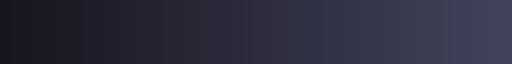

In [6]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

ebv_cmap = truncate_colormap(cm.bone, 0.1, 0.3)
ebv_cmap

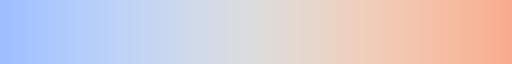

In [7]:
stars_cmap = truncate_colormap(cm.coolwarm, 0.3, 0.7)

stars_cmap

In [8]:
# Read constellations data

# Read constellations file
const = pd.read_csv('constellationship.fab', header=None)
const['constellation'] = const[0].str.split().str.get(0)
const['num_pairs'] = const[0].str.split().str.get(1)
const['stars'] = const[0].str.split().str[2:]
const.drop(0, axis=1, inplace=True)


# Read constellations name
const_names = pd.read_csv('constellation_names.eng.fab', header=None)
const_names = const_names[0].str.replace('\t', '').str.split('"', expand=True)
const_names.drop([2, 3, 4], axis=1, inplace=True)
const_names.columns = ['constellation', 'name']

# Combine both
assert len(const) == len(const_names)
const = pd.merge(const, const_names, on="constellation")


# Get stars ra and dec
const['ra'] = ''
const['dec'] = ''

for index, row in const.iterrows(): 
    ras, decs = [], []
    for star in row['stars']: 
        temp = star_catalog[star_catalog['hip']==float(star)]
        assert len(temp) == 1
        ras.append(temp['ra_hour'].tolist()[0])
        decs.append(temp['de_degree'].tolist()[0])
    const.at[index, 'ra'] = np.array(ras)*15
    const.at[index, 'dec'] = decs

    
# Set zodiac boolean
zodiacs = ['Aquarius', 'Aries', 'Cancer', 'Capricornus', 'Gemini', 'Leo', 'Libra', 
           'Pisces', 'Sagittarius', 'Scorpius', 'Taurus', 'Virgo']
const['zodiac'] = const['name'].isin(zodiacs)
display(const.head())

const[const["name"] == "Fornax"]


constellation num_pairs                                              stars  \
0           Aql         8  [98036, 97649, 97649, 97278, 97649, 95501, 955...   
1           And         5  [677, 3092, 3092, 5447, 9640, 5447, 5447, 4436...   
2           Scl         3       [116231, 4577, 4577, 115102, 115102, 116231]   
3           Ara         7  [88714, 85792, 85792, 83081, 83081, 82363, 823...   
4           Lib         5  [77853, 76333, 76333, 74785, 74785, 72622, 726...   

        name                                                 ra  \
0     Aquila  [298.828305, 297.69582, 297.69582, 296.5649100...   
1  Andromeda  [2.096865, 9.83193, 9.83193, 17.43291, 30.9747...   
2   Sculptor  [353.24268, 14.65149, 14.65149, 349.705995, 34...   
3        Ara  [271.6578, 262.96042500000004, 262.96042500000...   
4      Libra  [238.456395, 233.881575, 233.881575, 229.25173...   

                                                 dec  zodiac  
0  [6.406763, 8.868322, 8.868322, 10.613261, 8.86...   False  
1  [29.090432, 30.861024, 30.861024, 35.620558, 4...   False  
2  [-37.818268, -29.357449, -29.357449, -32.53202...   False  
3  [-50.091477, -49.876145, -49.876145, -55.99014...   False  
4  [-16.729293, -14.789537, -14.789537, -9.382917...    True

constellation num_pairs           stars    name  \
35           For         1  [13147, 14879]  Fornax   

                                 ra                       dec  zodiac  
35  [42.272535000000005, 48.018735]  [-32.405898, -28.987618]   False

In [9]:
# Read constellation boundaries

const_bound = pd.read_csv("const_bound_J2000.csv")

cst, ras, decs = [], [], []
for name, group in const_bound.groupby('cst'):
    cst.append(name)
    ras.append(group['RAJ2000'].tolist())
    decs.append(group['DEJ2000'].tolist())
    
const_bound = pd.DataFrame(data={'name':cst, 'ra':ras, 'dec':decs})
display(const_bound.head())

name                                                 ra  \
0  AND  [353.0356980555555, 352.0273875, 351.018963055...   
1  ANT  [146.67507611111108, 145.67067138888888, 144.6...   
2  APS  [207.8734875, 207.98010305555556, 208.10515944...   
3  AQL  [280.3861711111111, 280.3741544444444, 280.362...   
4  AQR  [309.67500749999994, 309.66539388888884, 309.6...   

                                                 dec  
0  [35.1897736, 35.1880264, 35.1860695, 35.183898...  
1  [-24.5768433, -24.5699406, -24.5628624, -24.55...  
2  [-76.6233521, -77.6230698, -78.6227417, -79.62...  
3  [-2.8842952, -1.8843669, -0.8844388, 0.1154895...  
4  [-7.5634623, -6.563508, -5.5635533, -4.5635982...

In [10]:
# Load messier data

messier_df = pd.read_csv('messier_ngc.csv')

messier_df['ra_h'] = messier_df['ra'].str.split("h ").str.get(0).astype(int)
messier_df['ra_min'] = messier_df['ra'].str.split("h ").str.get(1).str.replace("m", "").astype(float)
messier_df['ra'] = 15*(messier_df['ra_h'] + messier_df['ra_min']/60)

messier_df['dec_sign'] = messier_df['dec'].str.get(0)
messier_df['dec_degrees'] = np.abs(messier_df['dec'].str.split("d").str.get(0).astype(int))
messier_df['dec_seconds'] = messier_df['dec'].str.split("d ").str.get(1).str.replace("'", "").astype(float)
messier_df['dec'] = messier_df['dec_degrees'] + messier_df['dec_seconds']/60
messier_df['dec'] = messier_df['dec_sign'] + messier_df['dec'].astype(str)
messier_df['dec'] = messier_df['dec'].astype(float)
messier_df.drop(['ra_h', 'ra_min', 'dec_sign', 'dec_degrees', 'dec_seconds'], axis=1, inplace=True)

#code = np.full(len(messier), "")
#for i in range(len(messier)):
#    code[i] = str(messier.loc[i, 'type'])
#    for uni in unicodes.keys():
#        code[i] = code[i].replace(uni, unicodes[uni])

#print(code)
proper_name = np.array(messier_df['proper_name'])
messier_name = np.array(messier_df['name'])

for i in range(len(proper_name)):
    try:
        if np.isnan(proper_name[i]):
            proper_name[i] = messier_name[i]
    except:
        pass
    
messier_df['name_2'] = proper_name

messier_types = list(set(messier_df["type"]))
print(messier_types)

messier_df.head()

['open cluster', 'spiral galaxy', 'star cloud', 'globular cluster', 'emission nebula, open cluster', 'emission nebula']


name                           type       ra        dec  magnitude  \
0  M11                   open cluster  282.775  -6.266667        5.8   
1  M13               globular cluster  250.425  36.466667        5.8   
2  M15               globular cluster  322.500  12.166667        6.2   
3  M16                   open cluster  274.700 -13.783333        6.0   
4  M17  emission nebula, open cluster  275.200 -16.183333        6.0   

         proper_name             name_2  
0  Wild Duck Cluster  Wild Duck Cluster  
1   Hercules Cluster   Hercules Cluster  
2                NaN                M15  
3       Eagle Nebula       Eagle Nebula  
4        Swan Nebula        Swan Nebula

In [11]:
# Create random sample of background stars

rand_sample_ra = []
rand_sample_de = []

base_size = 20000
delta_de = np.pi/10

for de in np.arange(-np.pi/2, np.pi/2 + delta_de, delta_de):
    samp_size = int(base_size * np.cos((de+de+delta_de)/2))
    if samp_size <= 0:
        continue

    ra_i = -180 + np.random.random(samp_size)*360
    de_i = de*180/np.pi + np.random.random(samp_size)*delta_de*180/np.pi
    
    rand_sample_ra += list(ra_i)
    rand_sample_de += list(de_i)

rand_sample_ra = np.array(rand_sample_ra)
rand_sample_de = np.array(rand_sample_de)

rand_sample_ra

array([ -88.8102062 , -109.30721047,  -64.86652517, ..., -139.94260838,
        172.10766622,   26.58036645])

In [12]:
def Vmag_to_s(Vmag):
    smax = 0
    Vmag_max = 6
    smin = 3
    Vmag_min = 1
    
    a = (smax - smin)/(Vmag_max - Vmag_min)
    b = smax - a*Vmag_max
    
    s = np.full(len(Vmag), np.nan)
    
    for i in range(len(Vmag)):
        if Vmag[i] > Vmag_max:
            s[i] = smax
        elif Vmag[i] < Vmag_min:
            s[i] = smin
        else:
            s[i] = a*Vmag[i] + b
    
    s = 3**s
    return s

In [13]:
# Get the galactic plane

gal_ll = np.arange(-180, 180, 0.1)
gal_bb = np.full(len(gal_ll), 0)

c = SkyCoord(frame="galactic", l=gal_ll*u.degree, b=gal_bb*u.degree)

gal_ra = c.icrs.ra.degree
gal_de = c.icrs.dec.degree

gal_ra[gal_ra > 180] = gal_ra[gal_ra > 180] - 360

# Get ecliptic plane

ecl_lon = np.arange(-180, 180, 0.1)
ecl_lat = np.full(len(gal_ll), 0)

ecl_c = SkyCoord(frame='geocentrictrueecliptic', lon=ecl_lon*u.degree, lat=ecl_lat*u.degree)

ecl_ra = ecl_c.icrs.ra.degree
ecl_de = ecl_c.icrs.dec.degree

ecl_ra[ecl_ra > 180] = ecl_ra[ecl_ra > 180] - 360

# Get equator
eq_ra = np.arange(-180, 180, 0.1)
eq_de = np.full(len(eq_ra), 0)

# Get galactic poles

sgp_ll = 0
sgp_bb = -90

c = SkyCoord(frame="galactic", l=sgp_ll*u.degree, b=sgp_bb*u.degree)

sgp_ra = c.icrs.ra.degree
sgp_de = c.icrs.dec.degree

ngp_ll = 0
ngp_bb = 90

c = SkyCoord(frame="galactic", l=ngp_ll*u.degree, b=ngp_bb*u.degree)

ngp_ra = c.icrs.ra.degree
ngp_de = c.icrs.dec.degree

gctr_ll = 0
gctr_bb = 0

c = SkyCoord(frame="galactic", l=gctr_ll*u.degree, b=gctr_bb*u.degree)

gctr_ra = c.icrs.ra.degree
gctr_de = c.icrs.dec.degree

lmc_ra = 15*(5+23/60.)
lmc_de = -1*(69+45/60.)

smc_ra = 15*(0+52/60.)
smc_de = -1*(72+48/60.)

In [14]:
# Board divisions
m1_de = np.arange(-90, 90, 0.1)
m1_ra = np.full(len(m1_de), -90)

m2_de = np.arange(-90, 90, 0.1)
m2_ra = np.full(len(m2_de), 0)

m3_de = np.arange(-90, 90, 0.1)
m3_ra = np.full(len(m3_de), 90)

p1_ra = np.arange(-180, 180, 0.1)
p1_de = np.full(len(eq_ra), 30)

p2_ra = np.arange(-180, 180, 0.1)
p2_de = np.full(len(eq_ra), -30)

p3_ra = np.arange(-180, 180, 0.1)
p3_de = np.full(len(eq_ra), 75)

p4_ra = np.arange(-180, 180, 0.1)
p4_de = np.full(len(eq_ra), -75)


In [15]:
def plot_splus_field(ra, dec, galactic = False, ax = plt, **kargs):
    
    if ra > 180:
        ra = ra - 360
    ra = -ra
    
    # Calculate corners
    dec0 = dec - 0.7
    dec1 = dec - 0.7
    dec2 = dec + 0.7
    dec3 = dec + 0.7

    ra0 = ra - 0.7/np.cos(dec0*np.pi/180)
    ra1 = ra + 0.7/np.cos(dec1*np.pi/180)
    ra2 = ra + 0.7/np.cos(dec2*np.pi/180)
    ra3 = ra - 0.7/np.cos(dec3*np.pi/180)
    
    ra = np.array([ra0, ra1, ra2, ra3, ra0])
    dec = np.array([dec0, dec1, dec2, dec3, dec0])
    
    ra[ra > 180] = ra[ra > 180] - 360   
    
    dec[dec > 90] = 90
    dec[dec < -90] = -90
    
    ax.fill(ra, dec, **kargs)

In [16]:
def get_star_color(bv, vmin = 0, vmax = 1.5, cmap = stars_cmap):
    norm = colors.Normalize(vmin=vmin, vmax=vmax)    
    color = cmap(norm(bv))
    color = '#%02x%02x%02x' % (int(200*color[0]), int(200*color[1]), int(200*color[2]))
    
    return color

In [17]:
star_catalog[pd.notnull(star_catalog['greek_letters'])].sort_values("mag")

id      hip      hd_1    hr_1        gl         bf  \
0        32263  32349.0   48915.0  2491.0   Gl 244A   9Alp CMa   
1        30365  30438.0   45348.0  2326.0       NaN    Alp Car   
2        69451  69673.0  124897.0  5340.0    Gl 541  16Alp Boo   
84394    71456  71683.0  128620.0  5459.0   Gl 559A    Alp1Cen   
3        90979  91262.0  172167.0  7001.0    Gl 721   3Alp Lyr   
...        ...      ...       ...     ...       ...        ...   
118781  118781      NaN       NaN     NaN   Gl 452B        NaN   
118751  118747      NaN       NaN     NaN   NN 3655        NaN   
118970  118972      NaN       NaN     NaN   NN 3849        NaN   
119183  119182      NaN       NaN     NaN   NN 4029        NaN   
118949  118947      NaN       NaN     NaN  NN 3829B        NaN   

                 proper    ra_hour  de_degree     dist  ...     RAJ2000  \
0                Sirius   6.752481 -16.716116   2.6371  ...  06 45 08.9   
1               Canopus   6.399195 -52.695660  94.7867  ...  06 23 57.1   
2              Arcturus  14.261030  19.182410  11.2575  ...  14 15 39.7   
84394   Rigil Kentaurus  14.660765 -60.833976   1.3248  ...         NaN   
3                  Vega  18.615640  38.783692   7.6787  ...  18 36 56.3   
...                 ...        ...        ...      ...  ...         ...   
118781              NaN  11.887989  -7.375136  20.5634  ...         NaN   
118751              NaN  11.363683 -13.218445  14.2450  ...         NaN   
118970              NaN  14.478657  33.176703  10.5263  ...         NaN   
119183              NaN  17.833107  22.683357  14.8810  ...         NaN   
118949              NaN  14.203219  -0.588179  25.1889  ...         NaN   

          DEJ2000   B-V                SpType  NoteFlag   recno       RAdeg  \
0       -16 42 58  0.00    A1Vm                       *  2491.0  101.287083   
1       -52 41 45  0.15    F0II                       *  2326.0   95.987917   
2       +19 10 57  1.23    K1.5IIIFe-0.5              *  5340.0  213.915417   
84394         NaN   NaN                   NaN       NaN     NaN         NaN   
3       +38 47 01  0.00    A0Va                       *  7001.0  279.234583   
...           ...   ...                   ...       ...     ...         ...   
118781        NaN   NaN                   NaN       NaN     NaN         NaN   
118751        NaN   NaN                   NaN       NaN     NaN         NaN   
118970        NaN   NaN                   NaN       NaN     NaN         NaN   
119183        NaN   NaN                   NaN       NaN     NaN         NaN   
118949        NaN   NaN                   NaN       NaN     NaN         NaN   

            DEdeg  Separation  greek_letters  
0      -16.716111    0.454311           αCMa  
1      -52.695833    0.624265           αCar  
2       19.182500    0.343251           αBoo  
84394         NaN         NaN            nan  
3       38.783611    0.294932           αLyr  
...           ...         ...            ...  
118781        NaN         NaN            nan  
118751        NaN         NaN            nan  
118970        NaN         NaN            nan  
119183        NaN         NaN            nan  
118949        NaN         NaN            nan  

[119613 rows x 53 columns]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


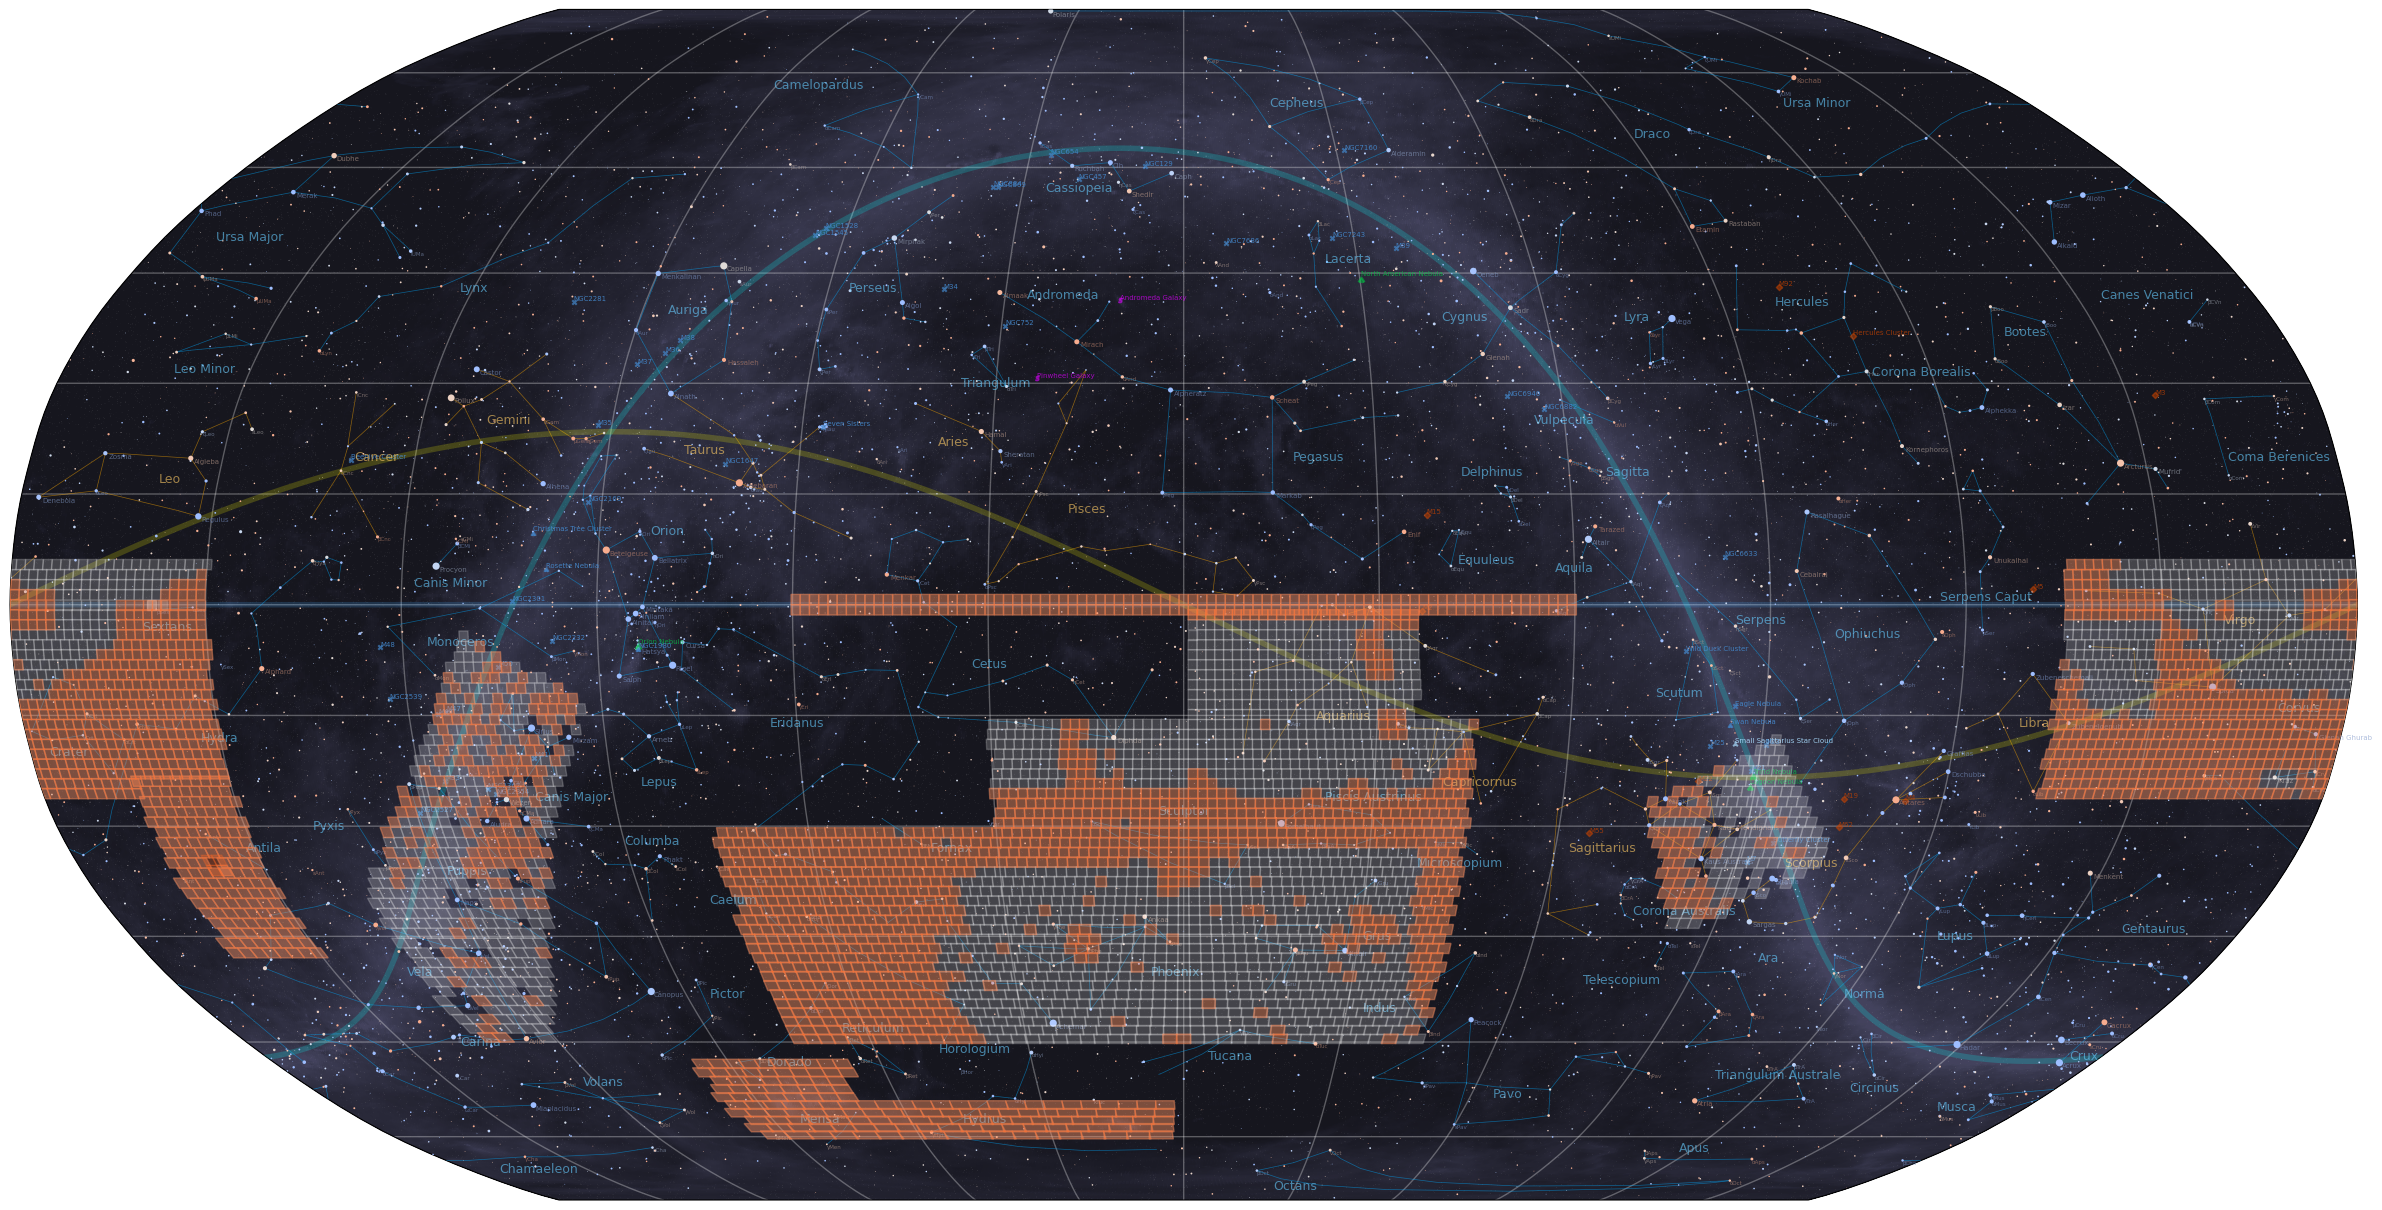

In [18]:
# Poster Version

plt.figure(figsize=(24,13))
#projection = ccrs.InterruptedGoodeHomolosine()
#projection = ccrs.Miller()
#projection = ccrs.Mercator()
#projection = ccrs.Mollweide()
projection = ccrs.Robinson()
#projection = ccrs.EckertIII()
#projection = ccrs.EckertIV(-90)
#projection = ccrs.EqualEarth()
#projection = ccrs.PlateCarree()

ax = plt.axes(projection=projection)

#plt.grid(True, color = "#444444", linewidth = 0.5)

# Plot extinction map
ax.scatter(-ebv_map["ra"], ebv_map["dec"], transform=ccrs.Geodetic(), c=np.log10(ebv_map["ebv"]), 
           cmap = ebv_cmap, marker="s", s=3, alpha=1, vmin = -1.5, vmax = 0.7, zorder = -3)

#ax.xlabel('RA')
#ax.ylabel('DEC')

# Plot stars
stars_s = np.array(Vmag_to_s(np.array(bright_stars.loc[:,"mag"])))
stars_c = (np.array(bright_stars["B-V"]))

ax.scatter(-bright_stars["RAdeg"], bright_stars["DEdeg"], transform=ccrs.Geodetic(), c=stars_c, 
           cmap = stars_cmap, s=stars_s, alpha=1, vmin = 0, vmax = 1.5, zorder = 20, linewidth=0)


faint_stars_alpha = 0.7 + (11-faint_stars.loc[:,"mag"])/17
faint_stars_color = np.random.random(len(faint_stars))
ax.scatter(-faint_stars["RAdeg"], faint_stars["DEdeg"], marker = "o", linewidth = 0, transform=ccrs.Geodetic(), 
           c = faint_stars_color, cmap = stars_cmap, vmin = 0, vmax = 1,  s=0.3, 
           alpha = faint_stars_alpha, zorder = 2)

#Plot random sample
rand_alpha = np.random.random(len(rand_sample_ra))*0.5
ax.scatter(-rand_sample_ra, rand_sample_de, marker = "o", linewidth = 0, transform=ccrs.Geodetic(), color = "#FFFFFF", 
           s=0.1, alpha = rand_alpha, zorder = 1)


# Plot Messier
# define s, marker, color, alpha
messier_style = {'emission nebula':[20, 6, "#00CC44", 0.5],
                 'emission nebula, open cluster':[10, 6, "#4488CC", 0.7], 
                 'star cloud': [20, "2", "#AADDFF", 0.7],
                 'globular cluster': [10, "D", "#CC4400", 0.5],
                 'open cluster': [10, "x", "#4488CC", 0.7],
                 'spiral galaxy': [10, r"$S$", "#DD00FF", 0.5]}

for key in messier_style.keys():
    
    messier_key = messier_df[messier_df["type"] == key]
    
    s, marker, color, alpha = messier_style[key]
    
    ra = np.array(list(messier_key["ra"]))
    dec = np.array(list(messier_key["dec"]))
    name = np.array(list(messier_key["name_2"]))
    
    ax.scatter(-ra, dec, s = s, marker = marker, color = color, alpha = alpha,
               transform=ccrs.Geodetic(), zorder = 21)
    
    for i in range(len(ra)):
        ax.text(-ra[i], dec[i], name[i], color=color, alpha = alpha + 0.2, fontsize = 5, 
                ha='left', va='bottom', transform=ccrs.Geodetic(), zorder = 31)
    
# Plot galactic plane
ax.plot(-gal_ra, gal_de, transform=ccrs.Geodetic(), color = "#00ffff", lw = 4, zorder = 10, alpha = 0.2)

#ax.scatter(-sgp_ra, sgp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
#ax.scatter(-ngp_ra, ngp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
#ax.scatter(-gctr_ra, gctr_de, transform=ccrs.Geodetic(), color = "#00ffff", marker="x", s = 100, alpha = 0.9, zorder = 21)
#ax.scatter(-lmc_ra, lmc_de, transform=ccrs.Geodetic(), color = "#DD00FF", marker="x", s = 60, alpha = 0.9, zorder = 21)
#ax.scatter(-smc_ra, smc_de, transform=ccrs.Geodetic(), color = "#DD00FF", marker="x", s = 60, alpha = 0.9, zorder = 21)

# Plot ecliptic plane
ax.plot(-ecl_ra, ecl_de, transform=ccrs.Geodetic(), color = "#ffff00", lw = 4, zorder = 11, alpha = 0.2)

# Plot equator plane
ax.plot(-eq_ra, eq_de, transform=ccrs.Geodetic(), color = "#44aaff", lw = 4, zorder = 12, alpha = 0.2)

# Plot paralelos
for mra in [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180]:
    m1_de = np.arange(-90, 90, 0.1)
    m1_ra = np.full(len(m1_de), mra)
    ax.plot(-m1_ra, m1_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 1, alpha = 0.3, zorder = -1)

# plot meridianos
for pde in [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75]:
    p2_ra = np.arange(-180, 180, 0.1)
    p2_de = np.full(len(eq_ra), pde)
    ax.plot(-p2_ra, p2_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 1, alpha = 0.3, zorder = -1)


# Plot constellations lines
for index, row in const.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    color = "#00AAFF"
    if row['zodiac'] == True: 
        color = "#FFAA00"
    for n in range(int(len(const)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), alpha = 0.5, color=color, lw=0.5, zorder = 5)
    
# Plot constellations borders
#for index, row in const_bound.iterrows():
#    ras = -np.array(row['ra'])
#    decs = np.array(row['dec'])
#    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=0.5, color="#AAAAAA", zorder = 6)

# Plot constellations names
const_names = pd.read_csv('centered_constellations.csv', encoding="latin-1")
for index, row in const_names.iterrows(): 
    ra_row = np.array(row['ra'])*360/24
    try:
        ra_row[ra_row > 360] = ra_row[ra_row > 180]-360
    except:
        if ra_row > 180:
            ra_row = ra_row - 360
    
    if row['name'] in zodiacs:
        color = "#FFCC66"
    else:
        color="#66CCFF"
        
    ax.text(-ra_row, row['dec'], row['name'], alpha = 0.6,
            transform=ccrs.Geodetic(), ha='center', va='center', fontsize=9, color=color, zorder = 31)

# Plot star names

names = star_catalog[pd.notnull(star_catalog['proper'])]

ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
proper_list = np.array(names["proper"])

ra_list[ra_list > 180] = ra_list[ra_list > 180] - 360

for i in range(100):
    color = get_star_color(bv_list[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
    ax.text(-ra_list[i]+0.5, de_list[i], proper_list[i], color=color, alpha = 0.6, fontsize = 5,
            ha='left', va='top', transform=ccrs.Geodetic(), zorder = 30)

# Plot greek letters
names = star_catalog[pd.notnull(star_catalog['greek_letters'])].sort_values("mag")
 
ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
con_list = np.array(names["con"])
greek_list =  np.array(names['greek_letters'])
proper_list2 = np.array(names["proper"])

constellations = list(set(con_list))[1:]

for con in constellations:
    count = 0
    
    ra_list_c = ra_list[con_list == con]
    de_list_c = de_list[con_list == con]
    bv_list_c = bv_list[con_list == con]
    greek_list_c =  greek_list[con_list == con]
    proper_list2_c = proper_list2[con_list == con]
    
    for i in range(len(ra_list_c)):
        if count == 3:
            break
        if proper_list2_c[i] in proper_list[:100]:
            continue
        if greek_list_c[i] == "nan":
            continue
    
        color = get_star_color(bv_list_c[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
        ax.text(-ra_list_c[i], de_list_c[i], greek_list_c[i], color=color, alpha = 0.6, fontsize = 4,
                ha='left', va='top', transform=ccrs.Geodetic(), zorder = 29)
        
        count += 1

# Plot SPLUS footprint
for i in range(len(all_splus)):
    plot_splus_field(all_splus.loc[i,"RA_d"],all_splus.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
                     color = "#FFFFFF", alpha = 0.2, zorder = 50)

for i in range(len(splus_idr5_psf)):
    plot_splus_field(splus_idr5_psf.loc[i,"RA_d"],splus_idr5_psf.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
                     color = "#FF6622", alpha = 0.3, zorder = 51)
    
plt.tight_layout()
plt.savefig("versao_poster.png", dpi = 300, transparent=True)

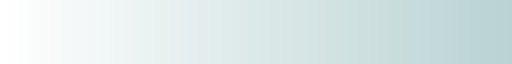

In [18]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

ebv_cmap_light = truncate_colormap(cm.bone_r, 0, 0.2)
ebv_cmap_light

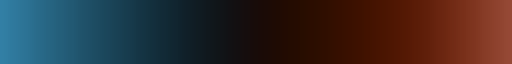

In [19]:
stars_cmap = truncate_colormap(cmc.berlin, 0.2, 0.8)

stars_cmap

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


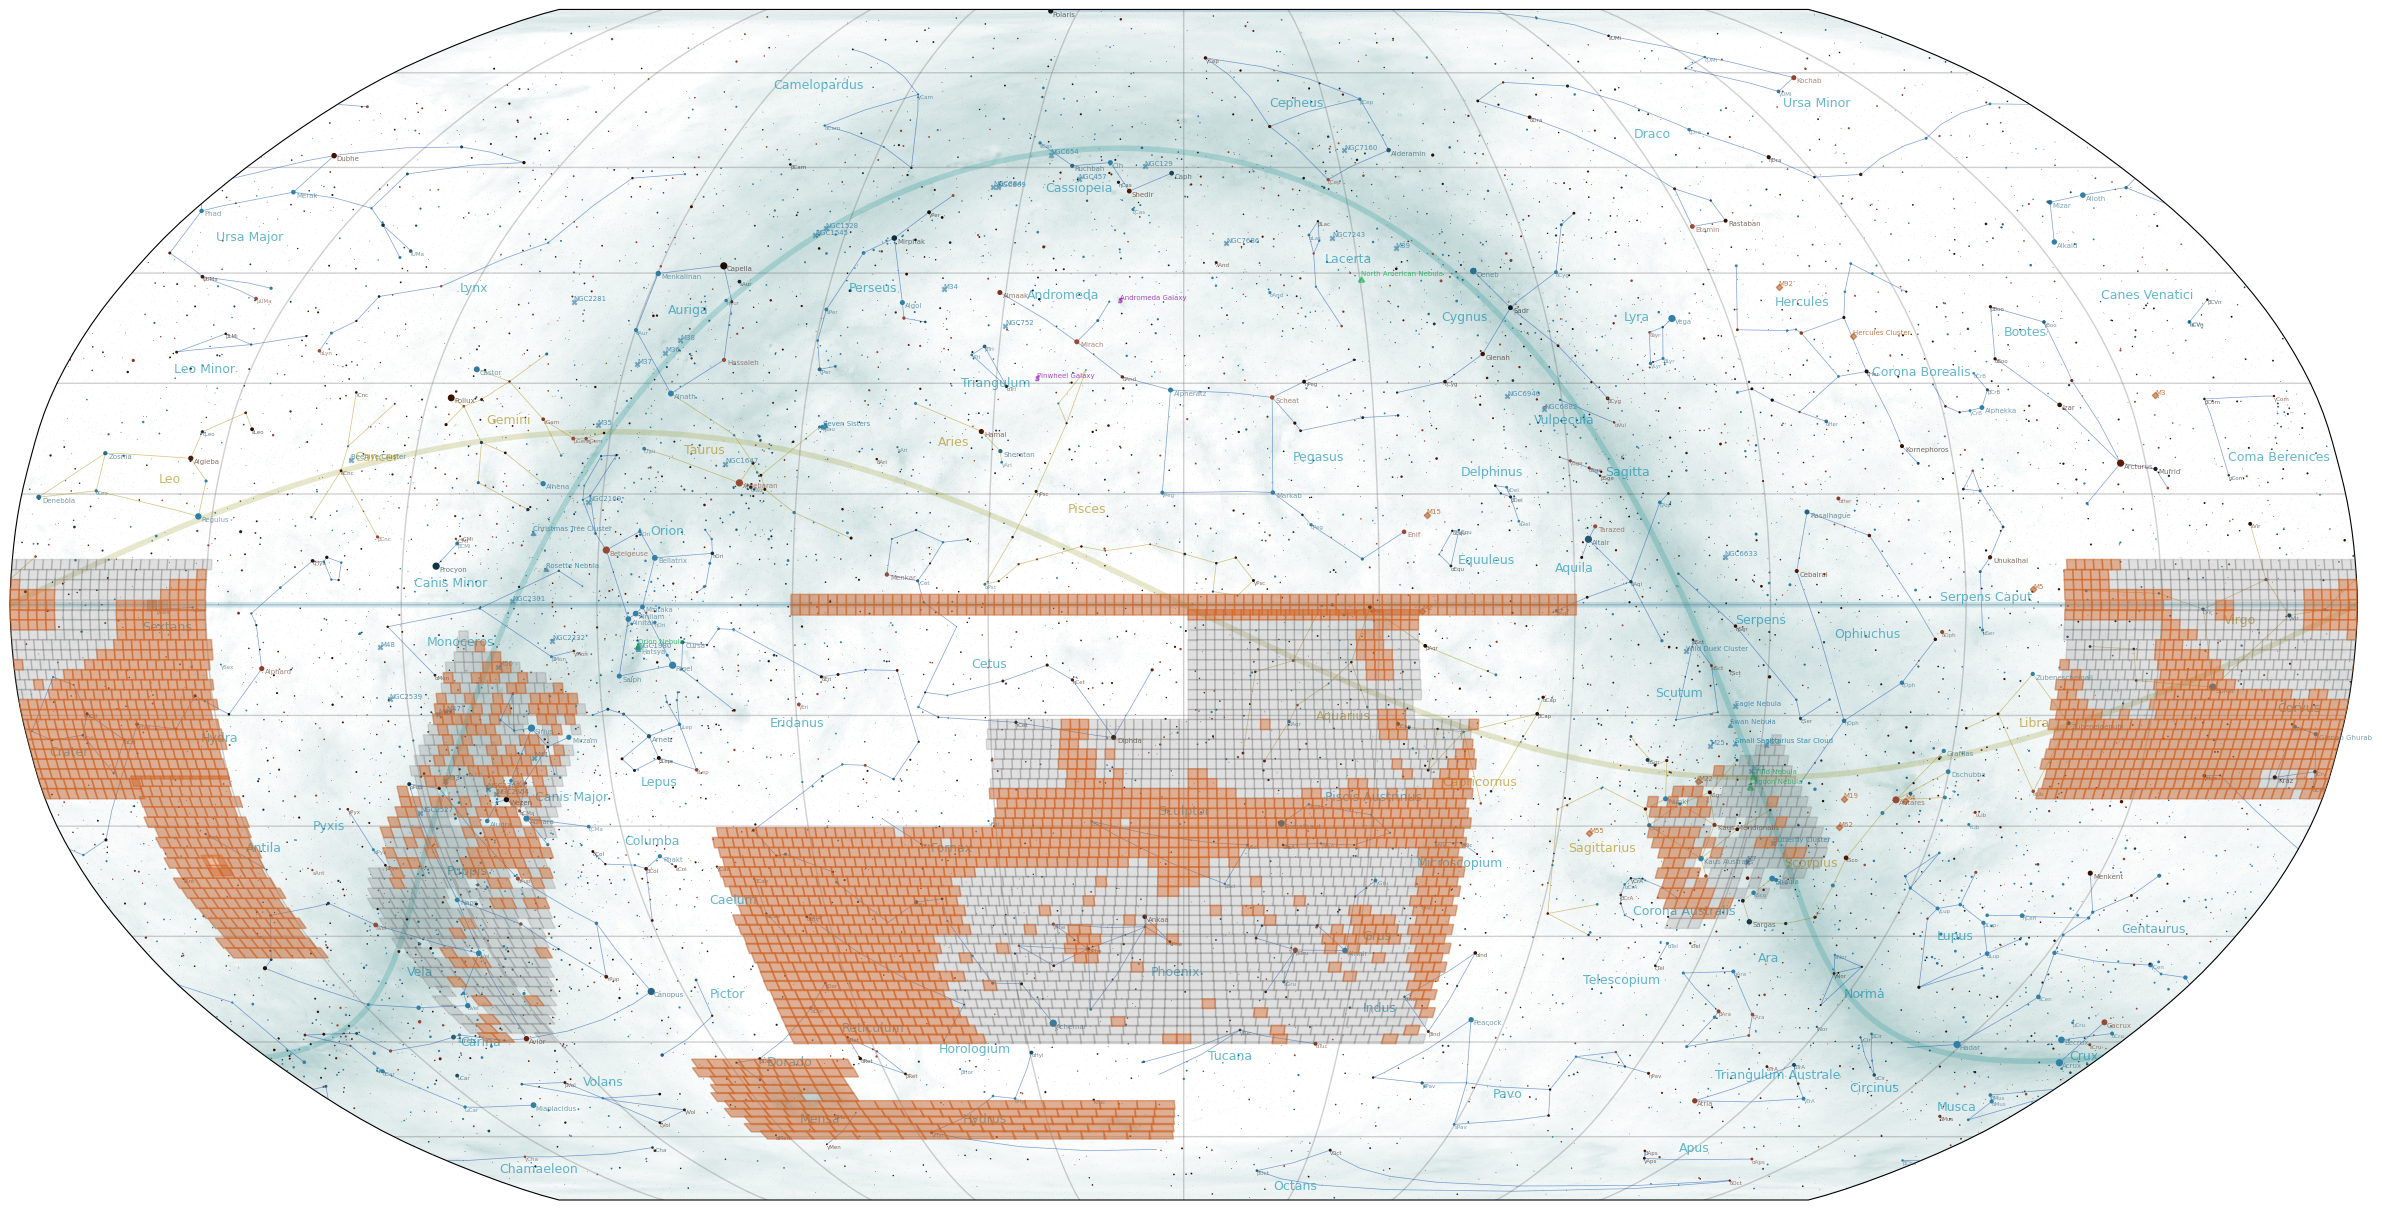

In [20]:
# Paper Version

plt.figure(figsize=(24,13))
#projection = ccrs.InterruptedGoodeHomolosine()
#projection = ccrs.Miller()
#projection = ccrs.Mercator()
#projection = ccrs.Mollweide()
projection = ccrs.Robinson()
#projection = ccrs.EckertIII()
#projection = ccrs.EckertIV(-90)
#projection = ccrs.EqualEarth()
#projection = ccrs.PlateCarree()

ax = plt.axes(projection=projection)

#plt.grid(True, color = "#444444", linewidth = 0.5)

# Plot extinction map
ax.scatter(-ebv_map["ra"], ebv_map["dec"], transform=ccrs.Geodetic(), c=np.log10(ebv_map["ebv"]), 
           cmap = ebv_cmap_light, marker="s", s=3, alpha=1, vmin = -1.5, vmax = 0.7, zorder = -3)

#ax.xlabel('RA')
#ax.ylabel('DEC')

# Plot stars
stars_s = np.array(Vmag_to_s(np.array(bright_stars.loc[:,"mag"])))
stars_c = (np.array(bright_stars["B-V"]))

ax.scatter(-bright_stars["RAdeg"], bright_stars["DEdeg"], transform=ccrs.Geodetic(), c=stars_c, 
           cmap = stars_cmap, s=stars_s, alpha=1, vmin = 0, vmax = 1.5, zorder = 20, linewidth=0)


faint_stars_alpha = 0.7 + (11-faint_stars.loc[:,"mag"])/17
faint_stars_color = np.random.random(len(faint_stars))
ax.scatter(-faint_stars["RAdeg"], faint_stars["DEdeg"], marker = "o", linewidth = 0, transform=ccrs.Geodetic(), 
           c = faint_stars_color, cmap = stars_cmap, vmin = 0, vmax = 1,  s=0.3, 
           alpha = faint_stars_alpha, zorder = 2)

#Plot random sample
rand_alpha = np.random.random(len(rand_sample_ra))*0.5
ax.scatter(-rand_sample_ra, rand_sample_de, marker = "o", linewidth = 0, transform=ccrs.Geodetic(), color = "#444444", 
           s=0.1, alpha = rand_alpha, zorder = 1)


# Plot Messier
# define s, marker, color, alpha
messier_style = {'emission nebula':[20, 6, "#00AA44", 0.5],
                 'emission nebula, open cluster':[10, 6, "#4488AA", 0.7], 
                 'star cloud': [20, "2", "#2288AA", 0.7],
                 'globular cluster': [10, "D", "#AA4400", 0.5],
                 'open cluster': [10, "x", "#4488AA", 0.7],
                 'spiral galaxy': [10, r"$S$", "#8800AA", 0.5]}

for key in messier_style.keys():
    
    messier_key = messier_df[messier_df["type"] == key]
    
    s, marker, color, alpha = messier_style[key]
    
    ra = np.array(list(messier_key["ra"]))
    dec = np.array(list(messier_key["dec"]))
    name = np.array(list(messier_key["name_2"]))
    
    ax.scatter(-ra, dec, s = s, marker = marker, color = color, alpha = alpha,
               transform=ccrs.Geodetic(), zorder = 21)
    
    for i in range(len(ra)):
        ax.text(-ra[i], dec[i], name[i], color=color, alpha = alpha + 0.2, fontsize = 5, 
                ha='left', va='bottom', transform=ccrs.Geodetic(), zorder = 31)
    
# Plot galactic plane
ax.plot(-gal_ra, gal_de, transform=ccrs.Geodetic(), color = "#008888", lw = 4, zorder = 10, alpha = 0.2)

#ax.scatter(-sgp_ra, sgp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
#ax.scatter(-ngp_ra, ngp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
#ax.scatter(-gctr_ra, gctr_de, transform=ccrs.Geodetic(), color = "#00ffff", marker="x", s = 100, alpha = 0.9, zorder = 21)
#ax.scatter(-lmc_ra, lmc_de, transform=ccrs.Geodetic(), color = "#DD00FF", marker="x", s = 60, alpha = 0.9, zorder = 21)
#ax.scatter(-smc_ra, smc_de, transform=ccrs.Geodetic(), color = "#DD00FF", marker="x", s = 60, alpha = 0.9, zorder = 21)

# Plot ecliptic plane
ax.plot(-ecl_ra, ecl_de, transform=ccrs.Geodetic(), color = "#888800", lw = 4, zorder = 11, alpha = 0.2)

# Plot equator plane
ax.plot(-eq_ra, eq_de, transform=ccrs.Geodetic(), color = "#2288aa", lw = 4, zorder = 12, alpha = 0.2)

# Plot paralelos
for mra in [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180]:
    m1_de = np.arange(-90, 90, 0.1)
    m1_ra = np.full(len(m1_de), mra)
    ax.plot(-m1_ra, m1_de, transform=ccrs.Geodetic(), color = "#666666", lw = 1, alpha = 0.3, zorder = -1)

# plot meridianos
for pde in [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75]:
    p2_ra = np.arange(-180, 180, 0.1)
    p2_de = np.full(len(eq_ra), pde)
    ax.plot(-p2_ra, p2_de, transform=ccrs.Geodetic(), color = "#666666", lw = 1, alpha = 0.3, zorder = -1)


# Plot constellations lines
for index, row in const.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    color = "#0044AA"
    if row['zodiac'] == True: 
        color = "#AA8800"
    for n in range(int(len(const)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), alpha = 0.5, color=color, lw=0.5, zorder = 5)
    
# Plot constellations borders
#for index, row in const_bound.iterrows():
#    ras = -np.array(row['ra'])
#    decs = np.array(row['dec'])
#    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=0.5, color="#AAAAAA", zorder = 6)

# Plot constellations names
const_names = pd.read_csv('centered_constellations.csv', encoding="latin-1")
for index, row in const_names.iterrows(): 
    ra_row = np.array(row['ra'])*360/24
    try:
        ra_row[ra_row > 360] = ra_row[ra_row > 180]-360
    except:
        if ra_row > 180:
            ra_row = ra_row - 360
    
    if row['name'] in zodiacs:
        color = "#AA8800"
    else:
        color="#0088AA"
        
    ax.text(-ra_row, row['dec'], row['name'], alpha = 0.6,
            transform=ccrs.Geodetic(), ha='center', va='center', fontsize=9, color=color, zorder = 31)

# Plot star names

names = star_catalog[pd.notnull(star_catalog['proper'])]

ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
proper_list = np.array(names["proper"])

ra_list[ra_list > 180] = ra_list[ra_list > 180] - 360

for i in range(100):
    color = get_star_color(bv_list[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
    ax.text(-ra_list[i]+0.5, de_list[i], proper_list[i], color=color, alpha = 0.6, fontsize = 5,
            ha='left', va='top', transform=ccrs.Geodetic(), zorder = 30)

# Plot greek letters
names = star_catalog[pd.notnull(star_catalog['greek_letters'])].sort_values("mag")
 
ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
con_list = np.array(names["con"])
greek_list =  np.array(names['greek_letters'])
proper_list2 = np.array(names["proper"])

constellations = list(set(con_list))[1:]

for con in constellations:
    count = 0
    
    ra_list_c = ra_list[con_list == con]
    de_list_c = de_list[con_list == con]
    bv_list_c = bv_list[con_list == con]
    greek_list_c =  greek_list[con_list == con]
    proper_list2_c = proper_list2[con_list == con]
    
    for i in range(len(ra_list_c)):
        if count == 3:
            break
        if proper_list2_c[i] in proper_list[:100]:
            continue
        if greek_list_c[i] == "nan":
            continue
    
        color = get_star_color(bv_list_c[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
        ax.text(-ra_list_c[i], de_list_c[i], greek_list_c[i], color=color, alpha = 0.6, fontsize = 4,
                ha='left', va='top', transform=ccrs.Geodetic(), zorder = 29)
        
        count += 1

# Plot SPLUS footprint
for i in range(len(all_splus)):
    plot_splus_field(all_splus.loc[i,"RA_d"],all_splus.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
                     color = "#666666", alpha = 0.2, zorder = 50)

for i in range(len(splus_idr5_psf)):
    plot_splus_field(splus_idr5_psf.loc[i,"RA_d"],splus_idr5_psf.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
                     color = "#DD6622", alpha = 0.4, zorder = 51)
    
plt.tight_layout()
plt.savefig("versao_paper_300dpi.png", dpi = 300, transparent=True)
plt.savefig("versao_paper.png", dpi = 90, transparent=True)

In [ ]:
plt.figure(figsize=(24,16))
#plt.subplot(111, projection=ccrs.Robinson())
#plt.subplot(111, projection=ccrs.EckertIII())
projection = ccrs.Mollweide()
plt.subplot(111, projection="aitoff")

#plt.grid(True, color = "#444444", linewidth = 0.5)

# Plot extinction map
plt.scatter(-ebv_map["ra"]*np.pi/180, ebv_map["dec"]*np.pi/180, c=np.log10(ebv_map["ebv"]), cmap = ebv_cmap, marker="s", s=3, alpha=1, vmin = -2.5, vmax = 1)
#ax.xlabel('RA')
#ax.ylabel('DEC')

# Plot bsc5 stars
bsc5_s = Vmag_to_s(star_catalog["Vmag"])
plt.scatter(-star_catalog["RAdeg"]*np.pi/180, star_catalog["DEdeg"]*np.pi/180, c=star_catalog["B-V"], cmap = bsc5_cmap, s=bsc5_s, alpha=1, vmin = 0, vmax = 1.5)

# Plot random sample
rand_alpha = 0.1 + np.random.random(len(rand_sample_ra))*0.5
plt.scatter(-rand_sample_ra*np.pi/180, rand_sample_de*np.pi/180, color = "#ffffff", s = 0.2, alpha = rand_alpha)

# Plot galactic plane
plt.plot(-gal_ra[:1170]*np.pi/180, gal_de[:1170]*np.pi/180, color = "#00ffff")
plt.plot(-gal_ra[1170:]*np.pi/180, gal_de[1170:]*np.pi/180, color = "#00ffff")

# Plot ecliptic plane
plt.plot(-ecl_ra[:]*np.pi/180, ecl_de[:]*np.pi/180, color = "#ffff00")

# Plot equator plane
plt.plot(-eq_ra*np.pi/180, eq_de*np.pi/180, color = "#44aaff")

# Plot meridianos
#plt.plot(-m1_ra*np.pi/180, m1_de*np.pi/180, color = "#ffffff")
#plt.plot(-m2_ra*np.pi/180, m2_de*np.pi/180, color = "#ffffff")
#plt.plot(-m3_ra*np.pi/180, m3_de*np.pi/180, color = "#ffffff")
#plt.plot(-p1_ra*np.pi/180, p1_de*np.pi/180, color = "#ffffff")
#plt.plot(-p2_ra*np.pi/180, p2_de*np.pi/180, color = "#ffffff")
#plt.plot(-p3_ra*np.pi/180, p3_de*np.pi/180, color = "#ffffff")
#plt.plot(-p4_ra*np.pi/180, p4_de*np.pi/180, color = "#ffffff")

# Plot star names
for i in range(len(bsc5_data)):
    if bsc5_data.loc[i, "Vmag"] < 2:
        ra_i = bsc5_data.loc[i, "RAdeg"]
        de_i = bsc5_data.loc[i, "DEdeg"]
        
        name_i = bsc5_data.loc[i, "Name"]
        
        ax.text((ra_i+0.1)*np.pi/180, (de_i+0.1)*np.pi/180, name_i, ha="left", va="top", fontsize = 7, color = "#ffffff")

labels = ['150°', '120°', '90°', '60°', '30°', '0°', '-30°', '-60°', '-90°', '-120°', '-150°']
plt.gca().set_xticklabels(labels)
    

In [ ]:
plt.figure(figsize=(24,13))
#projection = ccrs.InterruptedGoodeHomolosine()
#projection = ccrs.Miller()
#projection = ccrs.Mercator()
#projection = ccrs.Mollweide()
projection = ccrs.Robinson()
#projection = ccrs.EckertIII()
#projection = ccrs.EqualEarth()

ax = plt.axes(projection=projection)

#plt.grid(True, color = "#444444", linewidth = 0.5)

# Plot extinction map
ax.scatter(-ebv_map["ra"], ebv_map["dec"], transform=ccrs.Geodetic(), c=np.log10(ebv_map["ebv"]), 
           cmap = ebv_cmap, marker="s", s=3, alpha=1, vmin = -1.5, vmax = 0.7, zorder = -3)

plt.tight_layout()
plt.savefig("versao_0_only_ebv.png", dpi = 300)

In [ ]:
plt.figure(figsize=(24,13))
#projection = ccrs.InterruptedGoodeHomolosine()
#projection = ccrs.Miller()
#projection = ccrs.Mercator()
#projection = ccrs.Mollweide()
#projection = ccrs.Robinson()
projection = ccrs.EckertIII()
#projection = ccrs.EqualEarth()

ax = plt.axes(projection=projection)

# Plot constellations lines
for index, row in const.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    color = "#00AAFF"
    if row['zodiac'] == True: 
        color = "#FFAA00"
    for n in range(int(len(const)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=0.5, zorder = 5)
    
# Plot constellations borders
for index, row in const_bound.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=0.5, color="#AAAAAA", zorder = 6)

# Plot constellations names
const_names = pd.read_csv('centered_constellations.csv', encoding="latin-1")
for index, row in const_names.iterrows(): 
    ra_row = np.array(row['ra'])*360/24
    try:
        ra_row[ra_row > 360] = ra_row[ra_row > 180]-360
    except:
        if ra_row > 180:
            ra_row = ra_row - 360
    
    if row['name'] in zodiacs:
        color = "#FFCC66"
    else:
        color="#66CCFF"
        
    ax.text(-ra_row, row['dec'], row['name'], alpha = 0.8,
            transform=ccrs.Geodetic(), ha='center', va='center', fontsize=9, color=color, zorder = 31)

# Plot star names

names = star_catalog[pd.notnull(star_catalog['proper'])]

ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
name_list = np.array(names["proper"])

ra_list[ra_list > 180] = ra_list[ra_list > 180] - 360

for i in range(100):
    color = get_star_color(bv_list[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
    ax.text(-ra_list[i]+0.5, de_list[i]-0.5, name_list[i], color=color, alpha = 0.8, fontsize = 5,
            ha='left', va='center', transform=ccrs.Geodetic(), zorder = 30)

plot_splus_field(0,0, transform=ccrs.Geodetic())
plt.tight_layout()

In [ ]:
plt.figure(figsize=(24,13))
#projection = ccrs.InterruptedGoodeHomolosine()
#projection = ccrs.Miller()
#projection = ccrs.Mercator()
#projection = ccrs.Mollweide()
#projection = ccrs.Robinson()
#projection = ccrs.EckertIII()
#projection = ccrs.EckertIV(-90)
#projection = ccrs.EqualEarth()
projection = ccrs.PlateCarree()

ax = plt.axes(projection=projection)

#plt.grid(True, color = "#444444", linewidth = 0.5)

# Plot extinction map
ax.scatter(-ebv_map["ra"], ebv_map["dec"], transform=ccrs.Geodetic(), c=np.log10(ebv_map["ebv"]), 
           cmap = ebv_cmap, marker="s", s=3, alpha=1, vmin = -1.5, vmax = 0.7, zorder = -3)

#ax.xlabel('RA')
#ax.ylabel('DEC')

# Plot stars
stars_s = np.array(Vmag_to_s(np.array(bright_stars.loc[:,"mag"])))
stars_c = (np.array(bright_stars["B-V"]))

ax.scatter(-bright_stars["RAdeg"], bright_stars["DEdeg"], transform=ccrs.Geodetic(), c=stars_c, 
           cmap = stars_cmap, s=stars_s, alpha=1, vmin = 0, vmax = 1.5, zorder = 20, linewidth=0)


faint_stars_alpha = 0.7 + (11-faint_stars.loc[:,"mag"])/17
faint_stars_color = np.random.random(len(faint_stars))
ax.scatter(-faint_stars["RAdeg"], faint_stars["DEdeg"], marker = "o", linewidth = 0, transform=ccrs.Geodetic(), 
           c = faint_stars_color, cmap = stars_cmap, vmin = 0, vmax = 1,  s=0.3, 
           alpha = faint_stars_alpha, zorder = 2)

#Plot random sample
rand_alpha = np.random.random(len(rand_sample_ra))*0.5
ax.scatter(-rand_sample_ra, rand_sample_de, marker = "o", linewidth = 0, transform=ccrs.Geodetic(), color = "#FFFFFF", 
           s=0.1, alpha = rand_alpha, zorder = 1)


# Plot Messier
# define s, marker, color, alpha
messier_style = {'emission nebula':[20, 6, "#00CC44", 0.5],
                 'emission nebula, open cluster':[10, 6, "#4488CC", 0.7], 
                 'star cloud': [20, "2", "#AADDFF", 0.7],
                 'globular cluster': [10, "D", "#CC4400", 0.5],
                 'open cluster': [10, "x", "#4488CC", 0.7],
                 'spiral galaxy': [10, r"$S$", "#DD00FF", 0.5]}

for key in messier_style.keys():
    
    messier_key = messier_df[messier_df["type"] == key]
    
    s, marker, color, alpha = messier_style[key]
    
    ra = np.array(list(messier_key["ra"]))
    dec = np.array(list(messier_key["dec"]))
    name = np.array(list(messier_key["name_2"]))
    
    ax.scatter(-ra, dec, s = s, marker = marker, color = color, alpha = alpha,
               transform=ccrs.Geodetic(), zorder = 21)
    
    for i in range(len(ra)):
        ax.text(-ra[i], dec[i], name[i], color=color, alpha = alpha + 0.2, fontsize = 5, 
                ha='left', va='bottom', transform=ccrs.Geodetic(), zorder = 31)
    
# Plot galactic plane
ax.plot(-gal_ra, gal_de, transform=ccrs.Geodetic(), color = "#00ffff", lw = 2, zorder = 10, alpha = 0.4)

ax.scatter(-sgp_ra, sgp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
ax.scatter(-ngp_ra, ngp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
ax.scatter(-gctr_ra, gctr_de, transform=ccrs.Geodetic(), color = "#00ffff", marker="x", s = 100, alpha = 0.9, zorder = 21)
ax.scatter(-lmc_ra, lmc_de, transform=ccrs.Geodetic(), color = "#DD00FF", marker="x", s = 60, alpha = 0.9, zorder = 21)
ax.scatter(-smc_ra, smc_de, transform=ccrs.Geodetic(), color = "#DD00FF", marker="x", s = 60, alpha = 0.9, zorder = 21)

# Plot ecliptic plane
ax.plot(-ecl_ra, ecl_de, transform=ccrs.Geodetic(), color = "#ffff00", lw = 2, zorder = 11, alpha = 0.4)

# Plot equator plane
ax.plot(-eq_ra, eq_de, transform=ccrs.Geodetic(), color = "#44aaff", lw = 2, zorder = 12, alpha = 0.4)

# Plot meridianos
m1_de = np.arange(-90, 90, 0.1)
m1_ra = np.full(len(m1_de), -60)

m2_de = np.arange(-90, 90, 0.1)
m2_ra = np.full(len(m2_de), 60)

p1_ra = np.arange(-180, 180, 0.1)
p1_de = np.full(len(eq_ra), 25)

p2_ra = np.arange(-180, 180, 0.1)
p2_de = np.full(len(eq_ra), -25)

#ax.plot(-m1_ra, m1_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)
#ax.plot(-m2_ra, m2_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)
#ax.plot(-p1_ra, p1_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)
#ax.plot(-p2_ra, p2_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)


# Plot constellations lines
for index, row in const.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    color = "#00AAFF"
    if row['zodiac'] == True: 
        color = "#FFAA00"
    for n in range(int(len(const)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=0.5, zorder = 5)
    
# Plot constellations borders
#for index, row in const_bound.iterrows():
#    ras = -np.array(row['ra'])
#    decs = np.array(row['dec'])
#    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=0.5, color="#AAAAAA", zorder = 6)

# Plot constellations names
const_names = pd.read_csv('centered_constellations.csv', encoding="latin-1")
for index, row in const_names.iterrows(): 
    ra_row = np.array(row['ra'])*360/24
    try:
        ra_row[ra_row > 360] = ra_row[ra_row > 180]-360
    except:
        if ra_row > 180:
            ra_row = ra_row - 360
    
    if row['name'] in zodiacs:
        color = "#FFCC66"
    else:
        color="#66CCFF"
        
    ax.text(-ra_row, row['dec'], row['name'], alpha = 0.8,
            transform=ccrs.Geodetic(), ha='center', va='center', fontsize=9, color=color, zorder = 31)

# Plot star names

names = star_catalog[pd.notnull(star_catalog['proper'])]

ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
proper_list = np.array(names["proper"])

ra_list[ra_list > 180] = ra_list[ra_list > 180] - 360

for i in range(100):
    color = get_star_color(bv_list[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
    ax.text(-ra_list[i]+0.5, de_list[i], proper_list[i], color=color, alpha = 0.8, fontsize = 5,
            ha='left', va='top', transform=ccrs.Geodetic(), zorder = 30)

# Plot greek letters
names = star_catalog[pd.notnull(star_catalog['greek_letters'])].sort_values("mag")
 
ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
con_list = np.array(names["con"])
greek_list =  np.array(names['greek_letters'])
proper_list2 = np.array(names["proper"])

constellations = list(set(con_list))[1:]

for con in constellations:
    count = 0
    
    ra_list_c = ra_list[con_list == con]
    de_list_c = de_list[con_list == con]
    bv_list_c = bv_list[con_list == con]
    greek_list_c =  greek_list[con_list == con]
    proper_list2_c = proper_list2[con_list == con]
    
    for i in range(len(ra_list_c)):
        if count == 3:
            break
        if proper_list2_c[i] in proper_list[:100]:
            continue
        if greek_list_c[i] == "nan":
            continue
    
        color = get_star_color(bv_list_c[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
        ax.text(-ra_list_c[i], de_list_c[i], greek_list_c[i], color=color, alpha = 0.8, fontsize = 4,
                ha='left', va='top', transform=ccrs.Geodetic(), zorder = 29)
        
        count += 1

# Plot SPLUS footprint
#for i in range(len(all_splus)):
#    plot_splus_field(all_splus.loc[i,"RA_d"],all_splus.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
#                     color = "#AAAAAA", alpha = 0.15, zorder = 50)

#for i in range(len(splus_idr4)):
#    plot_splus_field(splus_idr4.loc[i,"RA_d"],splus_idr4.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
#                     color = "#22AAFF", alpha = 0.3, zorder = 51)
    
plt.tight_layout()
plt.savefig("versao_1_PlateCarree.png", dpi = 300)

In [ ]:
# DELETE

plt.figure(figsize=(24,13))
#projection = ccrs.InterruptedGoodeHomolosine()
#projection = ccrs.Miller()
#projection = ccrs.Mercator()
#projection = ccrs.Mollweide()
projection = ccrs.Robinson()
#projection = ccrs.EckertIII()
#projection = ccrs.EqualEarth()

ax = plt.axes(projection=projection)

#plt.grid(True, color = "#444444", linewidth = 0.5)

# Plot extinction map
ax.scatter(-ebv_map["ra"], ebv_map["dec"], transform=ccrs.Geodetic(), c=np.log10(ebv_map["ebv"]), 
           cmap = ebv_cmap, marker="s", s=3, alpha=1, vmin = -1.5, vmax = 0.7, zorder = -3)

#ax.xlabel('RA')
#ax.ylabel('DEC')

# Plot stars
stars_s = np.array(Vmag_to_s(np.array(bright_stars.loc[:,"mag"])))
stars_c = (np.array(bright_stars["B-V"]))

ax.scatter(-bright_stars["RAdeg"], bright_stars["DEdeg"], transform=ccrs.Geodetic(), c=stars_c, 
           cmap = stars_cmap, s=stars_s, alpha=1, vmin = 0, vmax = 1.5, zorder = 20, linewidth=0)

#ax.plot(-faint_stars["RAdeg"], faint_stars["DEdeg"], marker = "o", mew = 0, transform=ccrs.Geodetic(), color = stars_c, 
#           cmap = stars_cmap, ms=stars_s, alpha=1, vmin = 0, vmax = 1.5, zorder = 20, ls = "")


faint_stars_alpha = 0.7 + (11-faint_stars.loc[:,"mag"])/17
faint_stars_color = np.random.random(len(faint_stars))
ax.scatter(-faint_stars["RAdeg"], faint_stars["DEdeg"], marker = "o", linewidth = 0, transform=ccrs.Geodetic(), 
           c = faint_stars_color, cmap = stars_cmap, vmin = 0, vmax = 1,  s=0.3, 
           alpha = faint_stars_alpha, zorder = 2)

#Plot random sample
rand_alpha = np.random.random(len(rand_sample_ra))*0.5
ax.scatter(-rand_sample_ra, rand_sample_de, marker = "o", linewidth = 0, transform=ccrs.Geodetic(), color = "#FFFFFF", 
           s=0.1, alpha = rand_alpha, zorder = 1)


# Plot galactic plane
ax.plot(-gal_ra, gal_de, transform=ccrs.Geodetic(), color = "#00ffff", lw = 2, zorder = 10, alpha = 0.2)

ax.scatter(-sgp_ra, sgp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
ax.scatter(-ngp_ra, ngp_de, transform=ccrs.Geodetic(), color = "#ff00ff", marker="x", s = 100, alpha = 0.7, zorder = 21)
ax.scatter(-gctr_ra, gctr_de, transform=ccrs.Geodetic(), color = "#00ffff", marker="x", s = 100, alpha = 0.9, zorder = 21)

# Plot ecliptic plane
ax.plot(-ecl_ra, ecl_de, transform=ccrs.Geodetic(), color = "#ffff00", lw = 2, zorder = 11, alpha = 0.2)

# Plot equator plane
ax.plot(-eq_ra, eq_de, transform=ccrs.Geodetic(), color = "#44aaff", lw = 2, zorder = 12, alpha = 0.2)

# Plot meridianos
m1_de = np.arange(-90, 90, 0.1)
m1_ra = np.full(len(m1_de), -60)

m2_de = np.arange(-90, 90, 0.1)
m2_ra = np.full(len(m2_de), 60)

p1_ra = np.arange(-180, 180, 0.1)
p1_de = np.full(len(eq_ra), 25)

p2_ra = np.arange(-180, 180, 0.1)
p2_de = np.full(len(eq_ra), -25)

ax.plot(-m1_ra, m1_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)
ax.plot(-m2_ra, m2_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)
ax.plot(-p1_ra, p1_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)
ax.plot(-p2_ra, p2_de, transform=ccrs.Geodetic(), color = "#ffffff", lw = 0.5, alpha = 0.3, zorder = -1)

# Plot constellations lines
for index, row in const.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    color = "#00AAFF"
    if row['zodiac'] == True: 
        color = "#FFAA00"
    for n in range(int(len(const)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=0.5, zorder = 5)
    
# Plot constellations borders
for index, row in const_bound.iterrows():
    ras = -np.array(row['ra'])
    decs = np.array(row['dec'])
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=0.5, color="#AAAAAA", zorder = 6)

# Plot constellations names
const_names = pd.read_csv('centered_constellations.csv', encoding="latin-1")
for index, row in const_names.iterrows(): 
    ra_row = np.array(row['ra'])*360/24
    try:
        ra_row[ra_row > 360] = ra_row[ra_row > 180]-360
    except:
        if ra_row > 180:
            ra_row = ra_row - 360
    
    if row['name'] in zodiacs:
        color = "#FFCC66"
    else:
        color="#66CCFF"
        
    ax.text(-ra_row, row['dec'], row['name'], alpha = 0.8,
            transform=ccrs.Geodetic(), ha='center', va='center', fontsize=9, color=color, zorder = 31)

# Plot star names

names = star_catalog[pd.notnull(star_catalog['proper'])]

ra_list = np.array(names["RAdeg"])
de_list = np.array(names["DEdeg"])
bv_list = np.array(names["B-V"])
name_list = np.array(names["proper"])

ra_list[ra_list > 180] = ra_list[ra_list > 180] - 360

for i in range(100):
    color = get_star_color(bv_list[i], vmin = 0, vmax = 1.5, cmap = stars_cmap)
    ax.text(-ra_list[i]+0.5, de_list[i], name_list[i], color=color, alpha = 0.8, fontsize = 5,
            ha='left', va='top', transform=ccrs.Geodetic(), zorder = 30)

# Plot SPLUS footprint
for i in range(len(all_splus)):
    plot_splus_field(all_splus.loc[i,"RA_d"],all_splus.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
                     color = "#AAAAAA", alpha = 0.15, zorder = 50)

for i in range(len(splus_idr4)):
    plot_splus_field(splus_idr4.loc[i,"RA_d"],splus_idr4.loc[i,"DEC_d"],transform=ccrs.Geodetic(),
                     color = "#22AAFF", alpha = 0.3, zorder = 51)
    
plt.tight_layout()
plt.savefig("versao_1_Mollweide.png", dpi = 300)